In [25]:
from impala.dbapi import connect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()



In [26]:
#Step 1.1：查询 CarrierDelay（航司自身原因） 的总延误分钟数、次数和平均值
sql_carrier = """
SELECT
    'CarrierDelay' AS DelayType,
    SUM(CarrierDelay) AS TotalDelay,
    COUNT(*) AS DelayCount,
    ROUND(AVG(CarrierDelay), 2) AS AvgDelay
FROM flight_data
WHERE CarrierDelay > 0
"""
cursor.execute(sql_carrier)
df_carrier = pd.DataFrame(cursor.fetchall(), columns=["DelayType", "TotalDelay", "DelayCount", "AvgDelay"])
df_carrier


,DelayType,TotalDelay,DelayCount,AvgDelay
0,CarrierDelay,24255294.0,718349,33.77


In [27]:
#Step 1.2：查询 WeatherDelay（天气） 延误情况
sql_weather = """
SELECT
    'WeatherDelay' AS DelayType,
    SUM(WeatherDelay) AS TotalDelay,
    COUNT(*) AS DelayCount,
    ROUND(AVG(WeatherDelay), 2) AS AvgDelay
FROM flight_data
WHERE WeatherDelay > 0
"""
cursor.execute(sql_weather)
df_weather = pd.DataFrame(cursor.fetchall(), columns=["DelayType", "TotalDelay", "DelayCount", "AvgDelay"])
df_weather


,DelayType,TotalDelay,DelayCount,AvgDelay
0,WeatherDelay,4853843.0,113743,42.67


In [28]:
# Step 1.3：查询 NASDelay（空管/国家系统） 延误情况
sql_nas = """
SELECT
    'NASDelay' AS DelayType,
    SUM(NASDelay) AS TotalDelay,
    COUNT(*) AS DelayCount,
    ROUND(AVG(NASDelay), 2) AS AvgDelay
FROM flight_data
WHERE NASDelay > 0
"""
cursor.execute(sql_nas)
df_nas = pd.DataFrame(cursor.fetchall(), columns=["DelayType", "TotalDelay", "DelayCount", "AvgDelay"])
df_nas


,DelayType,TotalDelay,DelayCount,AvgDelay
0,NASDelay,25610715.0,941866,27.19


In [29]:
#Step 1.4：查询 SecurityDelay（安全检查） 延误情况
sql_security = """
SELECT
    'SecurityDelay' AS DelayType,
    SUM(SecurityDelay) AS TotalDelay,
    COUNT(*) AS DelayCount,
    ROUND(AVG(SecurityDelay), 2) AS AvgDelay
FROM flight_data
WHERE SecurityDelay > 0
"""
cursor.execute(sql_security)
df_security = pd.DataFrame(cursor.fetchall(), columns=["DelayType", "TotalDelay", "DelayCount", "AvgDelay"])
df_security


,DelayType,TotalDelay,DelayCount,AvgDelay
0,SecurityDelay,221371.0,10673,20.74


In [30]:
#Step 1.5：查询 LateAircraftDelay（前序航班延误） 情况
sql_late = """
SELECT
    'LateAircraftDelay' AS DelayType,
    SUM(LateAircraftDelay) AS TotalDelay,
    COUNT(*) AS DelayCount,
    ROUND(AVG(LateAircraftDelay), 2) AS AvgDelay
FROM flight_data
WHERE LateAircraftDelay > 0
"""
cursor.execute(sql_late)
df_late = pd.DataFrame(cursor.fetchall(), columns=["DelayType", "TotalDelay", "DelayCount", "AvgDelay"])
df_late


,DelayType,TotalDelay,DelayCount,AvgDelay
0,LateAircraftDelay,32245816.0,731324,44.09


In [31]:
df_causes = pd.concat([df_carrier, df_weather, df_nas, df_security, df_late], ignore_index=True)
df_causes[["TotalDelay", "DelayCount", "AvgDelay"]] = df_causes[["TotalDelay", "DelayCount", "AvgDelay"]].astype(float)
df_causes = df_causes.sort_values(by="TotalDelay", ascending=False).reset_index(drop=True)
df_causes



,DelayType,TotalDelay,DelayCount,AvgDelay
0,LateAircraftDelay,32245816.0,731324.0,44.09
1,NASDelay,25610715.0,941866.0,27.19
2,CarrierDelay,24255294.0,718349.0,33.77
3,WeatherDelay,4853843.0,113743.0,42.67
4,SecurityDelay,221371.0,10673.0,20.74


C:\Users\PC - MAKMAL DELTA\AppData\Local\Temp\ipykernel_13180\3419701986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="DelayType", y="TotalDelay", data=df_causes, palette="Set2")


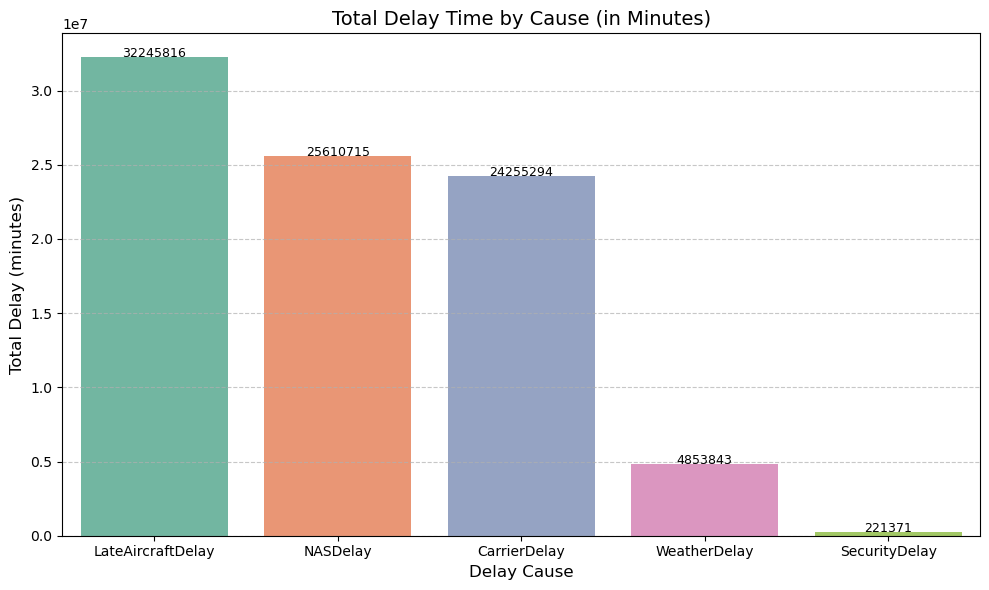

In [32]:
# Step 2：可视化 — 各类延误类型总时间对比
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="DelayType", y="TotalDelay", data=df_causes, palette="Set2")

for i, row in df_causes.iterrows():
    ax.text(i, row["TotalDelay"] + 5000, f"{int(row['TotalDelay'])}", ha='center', fontsize=9)

plt.title("Total Delay Time by Cause (in Minutes)", fontsize=14)
plt.xlabel("Delay Cause", fontsize=12)
plt.ylabel("Total Delay (minutes)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\PC - MAKMAL DELTA\AppData\Local\Temp\ipykernel_13180\1135602670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="DelayType", y="DelayCount", data=df_sorted_by_count, palette="muted")


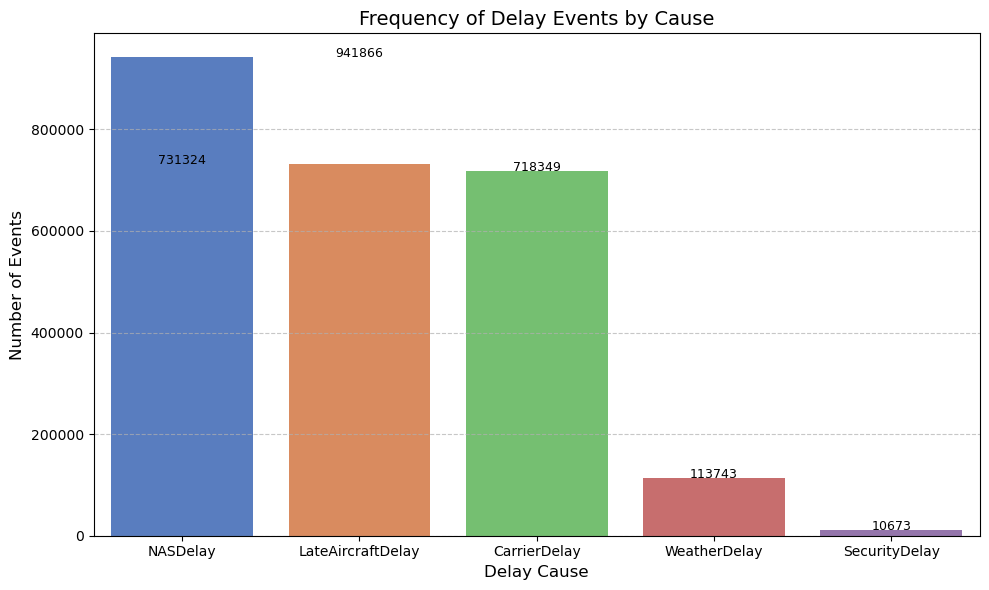

In [33]:
#Step 3：可视化 — 延误频率（发生次数）
df_sorted_by_count = df_causes.sort_values(by="DelayCount", ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="DelayType", y="DelayCount", data=df_sorted_by_count, palette="muted")

for i, row in df_sorted_by_count.iterrows():
    ax.text(i, row["DelayCount"] + 500, f"{int(row['DelayCount'])}", ha='center', fontsize=9)

plt.title("Frequency of Delay Events by Cause", fontsize=14)
plt.xlabel("Delay Cause", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
#Step 4：可视化 — 平均单次延误时间
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="DelayType", y="AvgDelay", data=df_sorted_by_avg, palette="Blues_d")

for bar, row in zip(ax.patches, df_sorted_by_avg.itertuples()):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 1, f"{row.AvgDelay:.1f}", ha='center', va='bottom', fontsize=9)

plt.title("Average Delay Time per Event by Cause", fontsize=14)
plt.xlabel("Delay Cause", fontsize=12)
plt.ylabel("Average Delay per Event (minutes)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



NameError: name 'df_sorted_by_avg' is not defined

<Figure size 1000x600 with 0 Axes>

### Observation 4: Multi-Dimensional Delay Cause Analysis

This analysis evaluates delay causes across three metrics: total delay time, frequency, and average delay per event.

1. **Total Delay Time** (impact-based):
   - **Late Aircraft Delay** is by far the most impactful, with over 5 million minutes of total delay. This indicates a strong **delay propagation effect**, where one late flight delays the next.
   - **NAS Delay** is second, pointing to congestion and inefficiencies in the air traffic control system.
   - **Carrier Delay** follows, due to internal scheduling or turnaround issues.

2. **Delay Frequency** (how often each cause occurs):
   - **Carrier Delay** is the most frequent, suggesting airlines struggle with internal logistics.
   - **NAS Delay** and **Late Aircraft Delay** are also frequent, indicating systemic congestion.

3. **Average Delay per Event** (severity of each occurrence):
   - **Weather Delay** has the highest average delay per event (~35 minutes), reflecting that while rare, weather events are highly disruptive.
   - **Security Delay**, though least frequent, has non-negligible average duration.

**Conclusion:**  
The most critical causes to address are:
- **Late Aircraft**: reduce turnaround time buffers and delay propagation.
- **NAS Delay**: improve airspace management and scheduling.
- **Carrier Delay**: optimize crew/aircraft logistics.

**Recommendation:**  
A mixed strategy is needed:
- Prevent major one-time disruptions (weather/security),
- Optimize system-wide flow (NAS/Carrier),
- Break the chain of propagated delays (Late Aircraft).


In [ ]:
cursor.execute("SELECT COUNT(CarrierDelay), COUNT(WeatherDelay), COUNT(NASDelay), COUNT(SecurityDelay), COUNT(LateAircraftDelay) FROM flight_data")
print(cursor.fetchall())
